In [39]:
import pandas as pd
import metpy
from siphon.catalog import TDSCatalog
from metpy.io import parse_metar_file
from datetime import datetime, timedelta
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import numpy as np
from metpy.plots import USCOUNTIES
import matplotlib.pyplot as plt


In [40]:
md_time = datetime(2023, 9, 18, 18, 00)


metar_cat = TDSCatalog('https://thredds.ucar.edu/thredds/catalog/noaaport/text/metar/catalog.xml')
sfc_obs = parse_metar_file(metar_cat.datasets.filter_time_nearest(md_time).remote_open(mode='t'))
sfc_obs = sfc_obs.set_index('date_time').groupby('station_id').first()


df = sfc_obs

print(df)


            latitude  longitude  elevation  wind_direction  wind_speed  \
station_id                                                               
BGBW           61.17     -45.42       26.0           260.0    5.000000   
BGGH           64.20     -51.68       70.0            60.0    8.000000   
BGJN           69.25     -51.07       25.0           310.0    4.000000   
BGKK           65.56     -37.13       34.0           250.0    7.000000   
BGSF           67.00     -50.72       53.0            60.0    6.000000   
...              ...        ...        ...             ...         ...   
ZWWW           43.88      87.47      654.0           180.0    3.887689   
ZYCC           43.98     125.68      238.0           230.0    9.719222   
ZYHB           45.62     126.25      140.0           210.0    9.719222   
ZYTL           38.97     121.53       97.0             NaN    1.943844   
ZYTX           41.63     123.48       35.0           260.0    1.943844   

            wind_gust  visibility cur

Text(0.5, 1.0, 'ASOS/AWOS Locations')

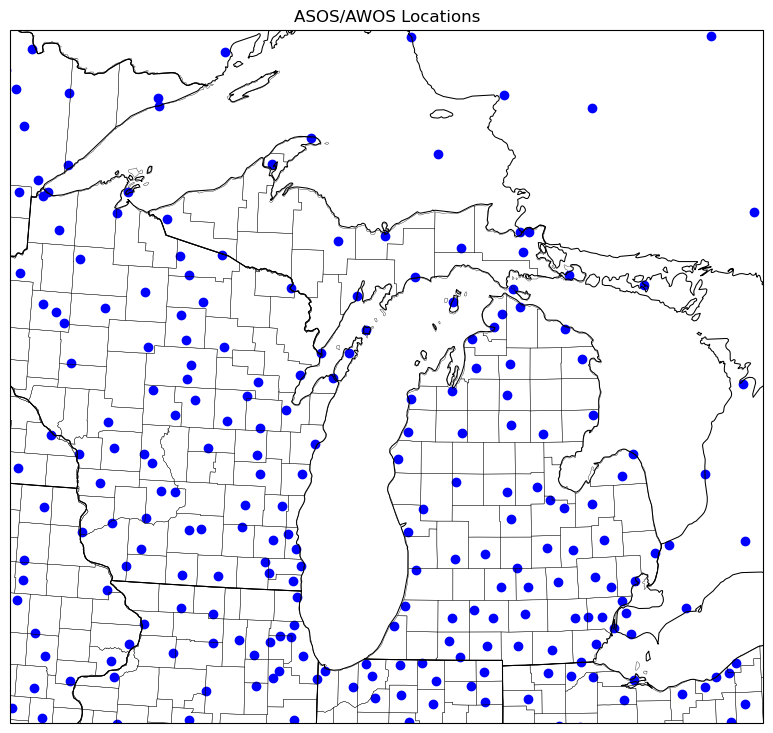

In [41]:
crs = ccrs.LambertConformal(central_longitude=-85, central_latitude=40)
datacrs = ccrs.PlateCarree() 

fig = plt.figure(figsize=(12,9))

ax = fig.add_subplot(1,1,1, projection=crs)
ax.set_extent([-92, -81.0, 41, 48.5], datacrs)
ax.add_feature(cfeature.STATES, linewidth=0.75)
ax.add_feature(USCOUNTIES.with_scale('5m'), linewidth=0.25)

ax.scatter(df['longitude'], df['latitude'], c='blue', transform=datacrs)
plt.title('ASOS/AWOS Locations')